#✨HOTEL BOOKINGS DATA✨

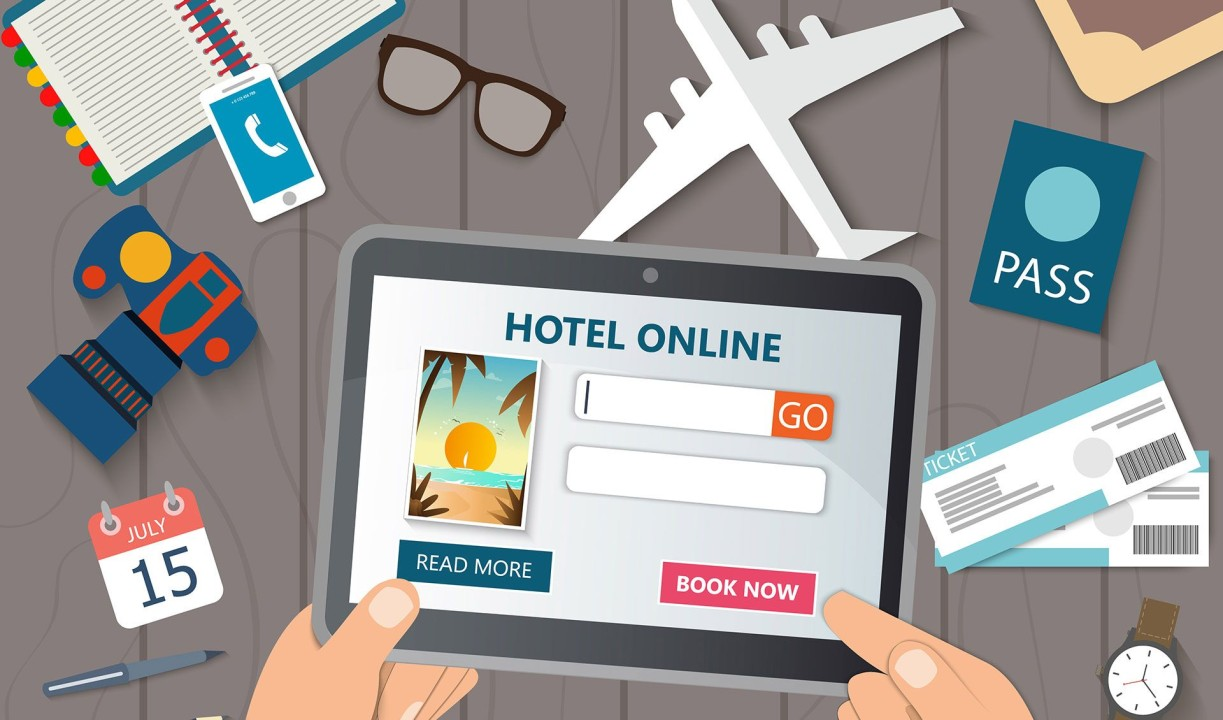



**Oleh**
1. **Septiannisa Alya Shinta Purwandhani (202110370311248)**
2. **Aletta Agigia Novta Sajiatmoko (202110370311366)**

##Pendahuluan🏢

###Pernyataan Masalah

Hotel Bookings Data adalah dataset terbuka yang berisi informasi mengenai permintaan pemesanan hotel, yang diambil dari penelitian [Antonio, Almeida dan Nunes, 2019](https://www.sciencedirect.com/science/article/pii/S2352340918315191#f0010).


Penggunaan dataset ini untuk pengembangan analisis Big Data memiliki beberapa alasan:


*   Memperluas peluang eksplorasi dalam analisis data.
*   Memberikan pemahaman yang lebih mendalam tentang tingkat pemesanan serta mengidentifikasi pola pembatalan.
*   Mendukung peningkatan jumlah pengunjung sekaligus meminimalkan potensi kerugian.
*   Membantu dalam memberikan rekomendasi hotel yang lebih tepat selama musim liburan.

Dalam industri perhotelan, salah satu tantangan terbesar adalah tingginya angka pembatalan pemesanan serta kebutuhan untuk merencanakan reservasi dengan lebih akurat. Terutama bagi hotel dengan kapasitas kamar yang terbatas, memahami kemungkinan pembatalan pemesanan menjadi sangat penting untuk mengoptimalkan pengelolaan sumber daya sekaligus meningkatkan pengalaman pelanggan.

Melalui analisis Hotel Bookings Data, kita dapat mengevaluasi pola pemesanan dan pembatalan untuk mengidentifikasi faktor-faktor yang memengaruhi pelanggan dalam membatalkan reservasi mereka. Wawasan ini dapat dimanfaatkan oleh pengelola hotel untuk merancang strategi pemesanan yang lebih efektif, mengurangi tingkat pembatalan, serta mengelola ketersediaan kamar secara lebih efisien.

###Rencana Untuk Mengatasi Pernyataan Masalah

Untuk menjawab permasalahan ini, Hotel Bookings Data menyediakan berbagai variabel penting seperti jenis hotel, status pembatalan, lead time (jangka waktu antara pemesanan dan kedatangan), jenis layanan makanan, dan banyak lagi.

Proses analisis menggunakan metodologi dengan beberapa tahapan:
*   Data Preprocessing: Melibatkan penanganan data yang hilang, mengubah variabel kategorikal menjadi format numerik, serta melakukan normalisasi untuk memastikan data siap digunakan.
*   Modeling: Menerapkan teknik pembelajaran mesin, seperti Random Forest untuk memprediksi peluang pembatalan berdasarkan variabel yang tersedia.
*   Model Evaluation: Menilai performa model menggunakan metrik evaluasi seperti akurasi, precision, recall, dan F1-score untuk mengukur sejauh mana model dapat memprediksi pembatalan secara akurat.


###Teknik Analisis Yang Digunakan

Pada tahap awal, dilakukan eksplorasi data (EDA) untuk memahami distribusi dan pola yang ada dalam dataset. Berbagai visualisasi, seperti grafik distribusi, histogram, dan heatmap, digunakan untuk mengidentifikasi variabel-variabel yang memiliki pengaruh signifikan terhadap pembatalan reservasi dan preferensi pelanggan. Selain itu, EDA juga berfungsi untuk mendeteksi keberadaan nilai yang hilang atau outlier dalam data, yang harus diperbaiki agar model yang dihasilkan memiliki akurasi yang lebih baik.

Pendekatan analisis berfokus pada pemodelan klasifikasi untuk memprediksi kemungkinan pembatalan pemesanan. Salah satu algoritma yang digunakan adalah Random Forest, yang membantu dalam mengidentifikasi variabel-variabel paling berpengaruh terhadap pembatalan serta memprediksi peluang pembatalan di masa mendatang. Random Forest memiliki keunggulan dalam mengatasi masalah overfitting, terutama pada dataset dengan banyak fitur, dan dapat memberikan wawasan yang lebih mendalam melalui analisis feature importance yang dihasilkan oleh model.

###Manfaat Analisis Untuk Para Konsumen

Analisis ini menawarkan manfaat yang signifikan, khususnya bagi konsumen seperti pengelola hotel atau manajer hotel, melalui beberapa aspek:

*   Mengurangi Pembatalan: Membantu mengidentifikasi pola pembatalan sehingga langkah pencegahan dapat diambil untuk menurunkan tingkat pembatalan reservasi.
*   Mengoptimalkan Kapasitas: Mempermudah pengelolaan kapasitas kamar dengan lebih efektif berdasarkan prediksi permintaan dan pembatalan.
*   Meningkatkan Pengalaman Pelanggan: Memastikan pelayanan yang lebih baik dengan perencanaan yang lebih matang sehingga kebutuhan pelanggan terpenuhi dengan optimal.
*   Strategi Pemasaran yang Lebih Efektif: Memberikan wawasan yang berguna untuk menyusun strategi pemasaran yang lebih relevan dan sesuai dengan preferensi pelanggan.


##Package Yang Diperlukan

In [ ]:
# Import package yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

Peringatan yang muncul saat memuat library seringkali dapat menyebabkan kebingungan. Oleh karena itu, menghilangkan pesan-pesan peringatan tersebut dapat membantu menjaga tampilan kode tetap bersih, terorganisir, profesional, dan lebih mudah dipahami.

In [ ]:
# Menghilangkan peringatan
warnings.filterwarnings("ignore")

In [ ]:
!pip freeze > requirements.txt

##Sumber Dataset

Dataset ini diambil dari [Hotel Bookings Dataset](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/hotels.csv) yang berisi informasi mengenai pemesanan hotel, termasuk jenis hotel, status pembatalan, tanggal kedatangan, jenis layanan makanan, serta preferensi pelanggan. Dataset ini awalnya dirancang untuk mendukung pengembangan model prediksi dalam mengklasifikasikan kemungkinan pembatalan pemesanan, melakukan segmentasi pelanggan, dan meningkatkan kepuasan guna mengoptimalkan sektor pariwisata dan perhotelan.

Detail dataset mencakup:


*   Periode Pengumpulan Data: 1 Juli 2015 hingga 31 Agustus 2017
*   Jumlah Variabel: 32 kolom
*   Jumlah Observasi: 119.390 baris data, terdiri dari 40.060 observasi untuk Hotel Resort (H1) dan 79.330 observasi untuk Hotel Kota (H2).

Jumlah Observasi: 119.390 baris data, terdiri dari 40.060 observasi untuk Hotel Resort (H1) dan 79.330 observasi untuk Hotel Kota (H2).
Keunikan dataset ini terletak pada pengumpulan data yang melibatkan dua jenis hotel berbeda, yaitu Hotel Resort (H1) dan Hotel Kota (H2), dengan mencakup data pemesanan yang direalisasikan maupun yang dibatalkan. Data dikumpulkan secara langsung (real) tanpa menyertakan informasi yang dapat mengidentifikasi hotel atau pelanggan untuk menjaga kerahasiaan.

Kedua hotel ini berlokasi di Portugal, dengan Hotel Resort (H1) berada di wilayah Algarve dan Hotel Kota (H2) terletak di Kota Lisbon.

In [ ]:
# Mengunduh file CSV dari URL GitHub
!wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv -O hotels.csv

--2024-12-29 06:46:47--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16855599 (16M) [text/plain]
Saving to: ‘hotels.csv’

hotels.csv          100%[===================>]  16.07M  --.-KB/s    in 0.06s   

2024-12-29 06:46:47 (282 MB/s) - ‘hotels.csv’ saved [16855599/16855599]



##Informasi Dataset

Setelah mengimpor data, langkah berikutnya adalah memahami struktur dan konten dataset, termasuk jumlah observasi, variabel, serta tipe data di setiap kolom. Proses ini bertujuan untuk memastikan bahwa semua kolom telah terimpor dengan benar dan untuk mengidentifikasi kemungkinan masalah, seperti tipe data yang tidak sesuai (contohnya, nilai numerik yang terimpor sebagai teks)

In [ ]:
# Membaca data dari file CSV
data = pd.read_csv('hotels.csv')

# Menampilkan 5 baris teratas dari dataset
pd.set_option('display.max_columns', None)
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Menampilkan informasi tentang kolom dan tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Missing values atau nilai yang hilang adalah masalah umum yang sering ditemukan dalam dataset. Penting untuk memeriksa jumlah data yang hilang di setiap kolom untuk memutuskan apakah perlu dilakukan imputasi atau penghapusan pada baris/kolom yang bermasalah. Kehadiran nilai yang hilang biasanya disebabkan oleh berbagai faktor, seperti ketidaktersediaan data pada saat pemesanan.

In [ ]:
# Menampilkan jumlah nilai yang hilang di setiap kolom
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


##Eksplorasi & Analisis Data

Eksplorasi data merupakan langkah awal dalam analisis yang bertujuan untuk memahami serta memperoleh wawasan mendalam mengenai dataset sebelum melanjutkan ke tahap pemrosesan berikutnya. Proses ini mencakup pemahaman terhadap struktur data, identifikasi potensi masalah, dan pembuatan visualisasi yang membantu mengurangi kemungkinan kesalahan selama analisis maupun pemodelan.

### 1.Perbandingan Pembatalan pemesanan Berdasarkan Bulan Kedatangan

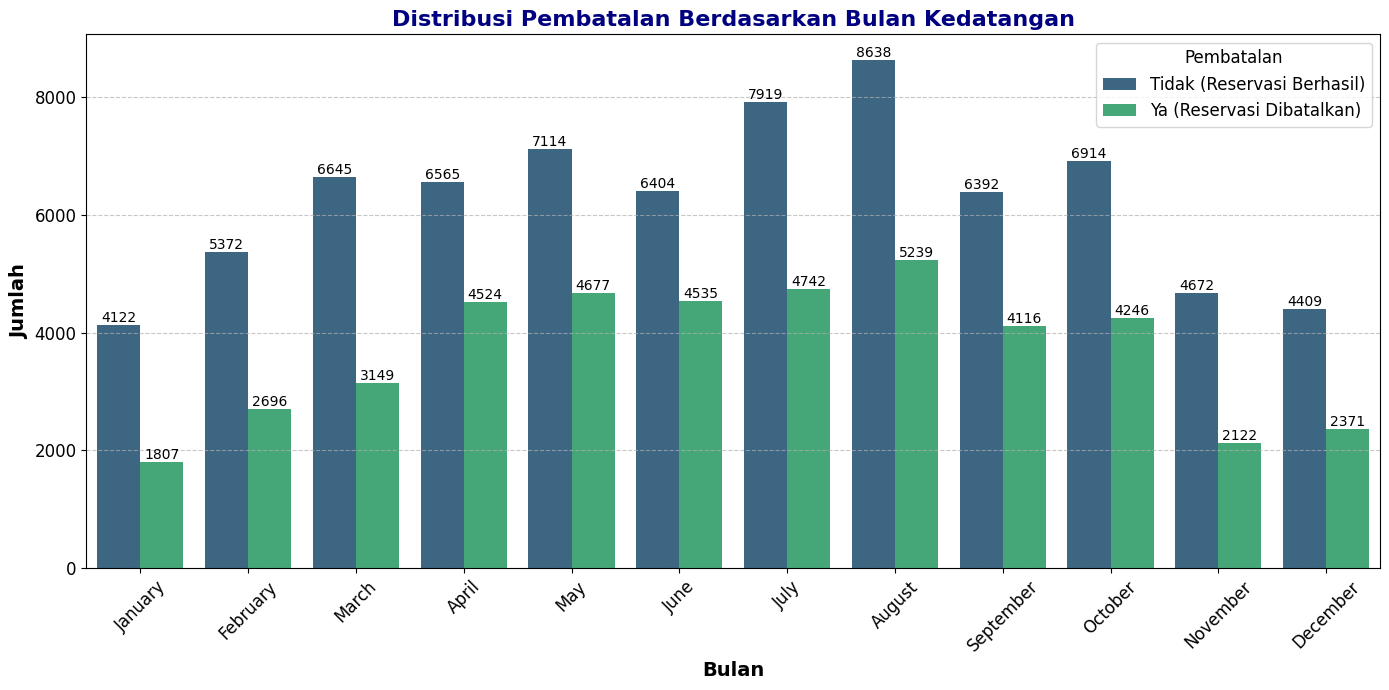

In [ ]:
# Urutkan bulan secara kronologis
order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=order_months, ordered=True)

# Plot distribusi pembatalan
plt.figure(figsize=(14, 7))
g = sns.countplot(
    data=data,
    x='arrival_date_month',
    hue='is_canceled',
    palette='viridis'
)

# Tambahkan data label di atas batang
for container in g.containers:
    g.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Tambahkan gaya visual
plt.title('Distribusi Pembatalan Berdasarkan Bulan Kedatangan', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Bulan', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan keterangan lebih menarik
plt.legend(
    title='Pembatalan',
    loc='upper right',
    labels=['Tidak (Reservasi Berhasil)', 'Ya (Reservasi Dibatalkan)'],
    fontsize=12,
    title_fontsize=12
)

# Sesuaikan tata letak
plt.tight_layout()
plt.show()

Berdasarkan visualisasi distribusi pembatalan berdasarkan bulan kedatangan, dapat disimpulkan bahwa pembatalan tertinggi terjadi pada bulan-bulan puncak seperti Juli dan Agustus, yang bertepatan dengan musim liburan atau peak season. Sebaliknya, pembatalan cenderung lebih rendah pada bulan-bulan seperti November dan Desember, yang termasuk dalam periode off-season dengan aktivitas perjalanan yang lebih sedikit. Selain itu, terlihat adanya tren di mana jumlah pembatalan meningkat seiring dengan meningkatnya jumlah reservasi, yang menunjukkan adanya hubungan antara tingkat reservasi dan frekuensi pembatalan.

### 2.Informasi Tahun Kedatangan

Visualisasi data tahun kedatangan dibagi menjadi dua grafik histogram untuk memberikan wawasan mengenai jumlah pemesanan hotel berdasarkan tahun serta bulan kedatangan. Tujuan dari visualisasi ini adalah untuk memperoleh gambaran yang lebih jelas tentang pola pemesanan hotel sepanjang tahun dan tren musiman yang mungkin ada

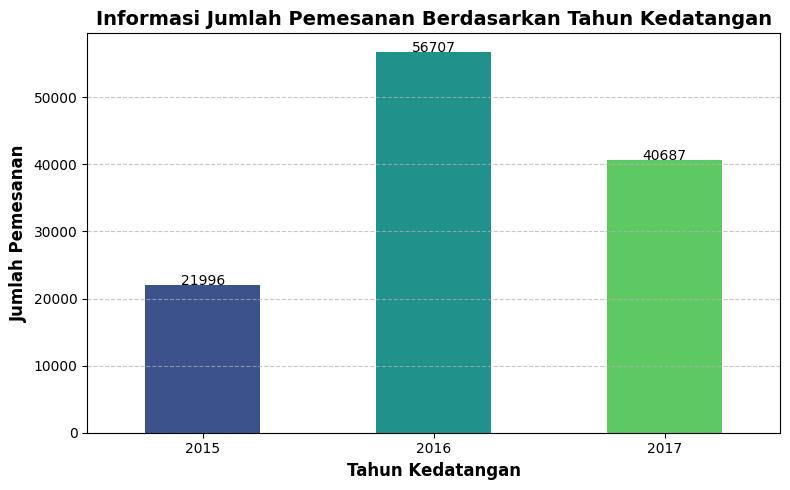

In [ ]:
# a. Berdasarkan Tahun
# Informasi jumlah pemesanan berdasarkan tahun kedatangan
arrival_year_info = data['arrival_date_year'].value_counts().sort_index()

# Membuat plot dengan palet warna gradasi
plt.figure(figsize=(8, 5))
bars = arrival_year_info.plot(kind='bar', color=sns.color_palette("viridis", len(arrival_year_info)))

# Menambahkan total nilai di atas batang
for i, value in enumerate(arrival_year_info):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10, color='black')

# Menambahkan judul dan label
plt.title('Informasi Jumlah Pemesanan Berdasarkan Tahun Kedatangan', fontsize=14, fontweight='bold')
plt.xlabel('Tahun Kedatangan', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Pemesanan', fontsize=12, fontweight='bold')

# Menambahkan grid untuk memperjelas pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Memperbaiki tampilan label dan tata letak
plt.xticks(rotation=0)
plt.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan visualisasi jumlah pemesanan berdasarkan tahun kedatangan, dapat disimpulkan bahwa tahun 2016 mencatatkan jumlah pemesanan tertinggi. Pada tahun tersebut, terjadi lonjakan yang signifikan dalam jumlah pemesanan jika dibandingkan dengan tahun 2015. Namun, di tahun 2017, terlihat adanya penurunan jumlah pemesanan meskipun tetap lebih tinggi daripada tahun 2015. Hal ini mengindikasikan adanya variasi dalam jumlah pemesanan setiap tahunnya, dengan puncak tertinggi terjadi pada tahun 2016

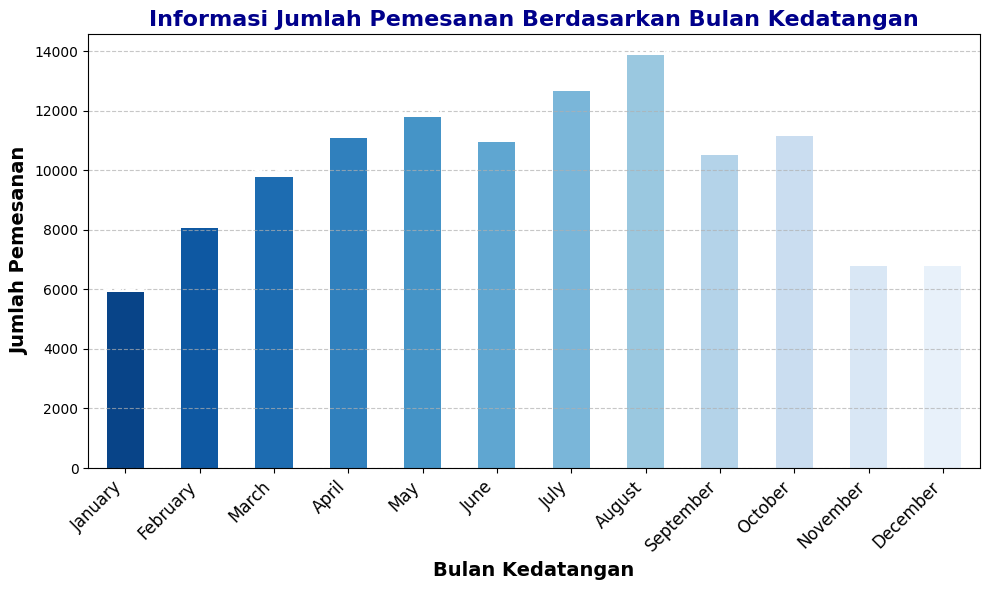

In [ ]:
# b. Berdasarkan Bulan
# Informasi jumlah pemesanan berdasarkan bulan kedatangan
order_months = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=order_months, ordered=True)

arrival_month_info = data['arrival_date_month'].value_counts().sort_index()

# Membuat plot dengan tema warna yang lebih menarik
plt.figure(figsize=(10, 6))
bars = arrival_month_info.plot(kind='bar', color=sns.color_palette("Blues_r", n_colors=12))

# Menambahkan total nilai di atas batang dengan tampilan lebih kreatif
for i, value in enumerate(arrival_month_info):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12, color='white', fontweight='bold')

# Menambahkan judul dan label dengan font yang lebih modern
plt.title('Informasi Jumlah Pemesanan Berdasarkan Bulan Kedatangan', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Bulan Kedatangan', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Pemesanan', fontsize=14, fontweight='bold')

# Mengatur tampilan bulan dengan rotasi yang lebih baik
plt.xticks(rotation=45, fontsize=12, ha='right')

# Menambahkan grid dan penataan layout untuk tampilan lebih rapi
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan visualisasi jumlah pemesanan per bulan, dapat disimpulkan bahwa Agustus mencatatkan jumlah pemesanan tertinggi dengan total 13.877 pemesan. Terdapat variasi signifikan sepanjang tahun, di mana bulan-bulan seperti November, Desember, dan Januari menunjukkan pemesanan yang relatif lebih rendah. Sementara itu, bulan Juni dan Juli tercatat memiliki jumlah pemesanan yang lebih tinggi, kemungkinan besar karena pengaruh musim liburan. Secara keseluruhan, pola pemesanan menunjukkan fluktuasi yang jelas sepanjang periode 2015 hingga 2017

### 3.Jumlah Pembatalan Pemesanan

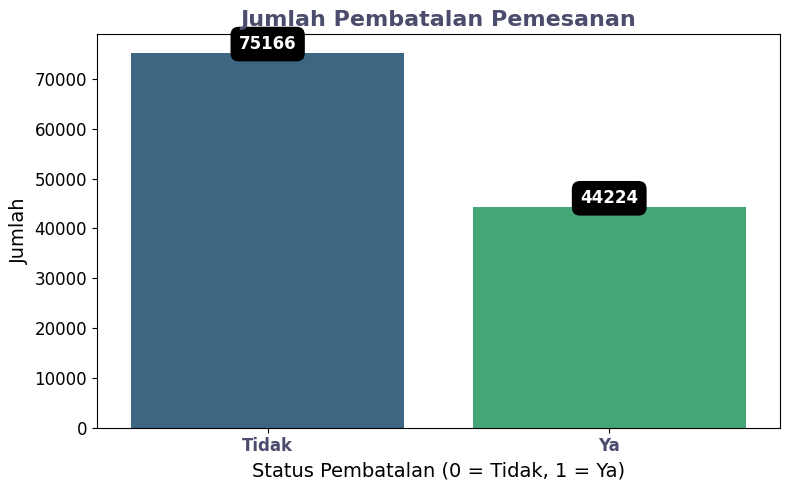

In [ ]:
# Plot jumlah pembatalan pemesanan dengan desain kreatif
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='is_canceled', data=data, palette='viridis')

# Menambahkan total nilai di atas batang dengan efek bayangan
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='white',
                bbox=dict(facecolor='black', edgecolor='none', boxstyle='round,pad=0.5'))

# Menambahkan judul dan label dengan font yang lebih elegan
plt.title('Jumlah Pembatalan Pemesanan', fontsize=16, fontweight='bold', color='#4C4C6C')
plt.xlabel('Status Pembatalan (0 = Tidak, 1 = Ya)', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)

# Menyesuaikan tampilan plot
plt.xticks([0, 1], ['Tidak', 'Ya'], fontsize=12, fontweight='bold', color='#4C4C6C')
plt.yticks(fontsize=12)
plt.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan visualisasi jumlah pembatalan pemesanan, dapat dilihat bahwa pemesanan yang tidak dibatalkan (status 0) jauh lebih banyak dibandingkan dengan yang dibatalkan (status 1). Dengan lebih dari 70.000 pemesanan yang berhasil, hal ini menunjukkan bahwa mayoritas transaksi berjalan lancar. Sebaliknya, jumlah pembatalan hanya sekitar 40.000, yang menandakan meskipun ada sejumlah pembatalan, proporsi pemesanan yang berhasil tetap lebih besar. Temuan ini menggambarkan bahwa tingkat pemesanan secara umum cukup tinggi, dengan tingkat pembatalan yang relatif rendah

### 4.Perbandingan Pembatalan Terhadap Pemesanan Hotel

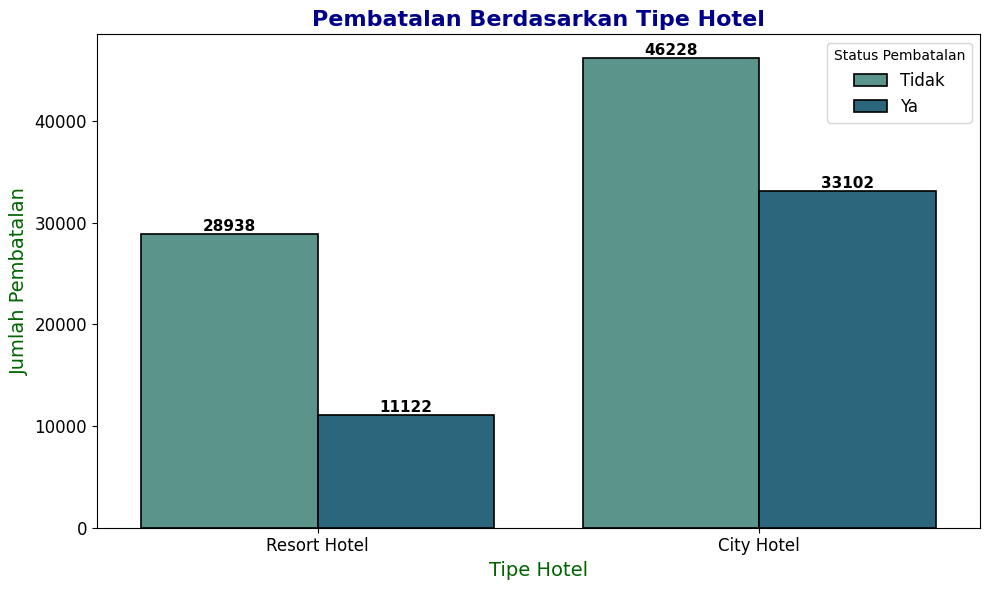

In [ ]:
# Plot pembatalan berdasarkan jumlah malam di akhir pekan
plt.figure(figsize=(10, 6))

# Menggunakan palet warna berbeda dan modifikasi gaya grafik
ax = sns.countplot(data=data, x='hotel', hue='is_canceled', palette='crest', edgecolor='black', linewidth=1.2)

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',  # Menampilkan nilai
                    (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                    ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Menambahkan judul, label, dan legenda dengan tampilan yang lebih menarik
plt.title('Pembatalan Berdasarkan Tipe Hotel', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Tipe Hotel', fontsize=14, color='darkgreen')
plt.ylabel('Jumlah Pembatalan', fontsize=14, color='darkgreen')

# Menyesuaikan tampilan legend
plt.legend(title='Status Pembatalan', loc='upper right', labels=['Tidak', 'Ya'], fontsize=12)

# Menyesuaikan tampilan X dan Y axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi pembatalan pemesanan berdasarkan jenis hotel, dapat disimpulkan bahwa Hotel Kota (City Hotel) mengalami jumlah pembatalan yang lebih banyak dibandingkan dengan Hotel Resort (Resort Hotel). Hotel Kota tercatat memiliki lebih dari 30.000 pembatalan, sementara Hotel Resort mencatatkan sekitar 20.000 pembatalan. Meskipun keduanya mengalami pembatalan, proporsi pembatalan yang lebih tinggi di Hotel Kota menunjukkan bahwa faktor seperti lokasi mungkin berperan dalam keputusan pelanggan untuk membatalkan pemesanan. Secara keseluruhan, hal ini menunjukkan bahwa Hotel Resort lebih efektif dalam mempertahankan pemesanan, sementara Hotel Kota tampaknya menghadapi tantangan yang lebih besar terkait pembatalan

### 5.Ditribusi Pemesanan Makanan

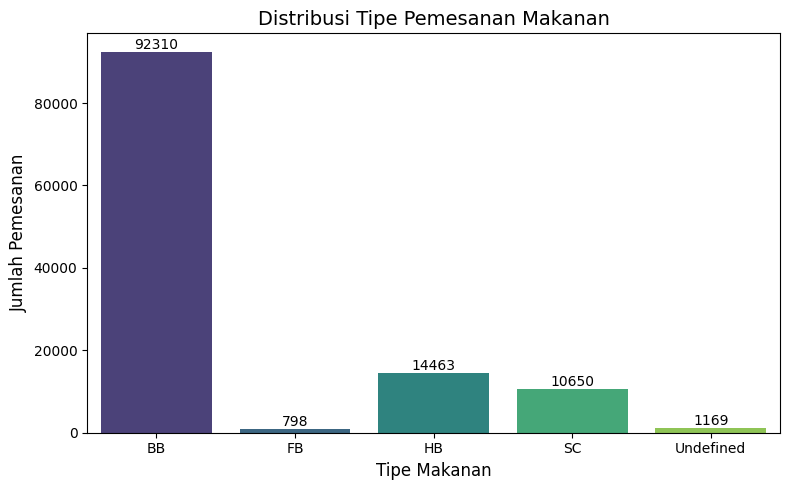

In [ ]:
# Plot distribusi tipe pemesanan makanan dengan palet warna yang lebih menarik
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='meal', data=data, palette='viridis')

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Tipe Pemesanan Makanan', fontsize=14)
plt.xlabel('Tipe Makanan', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi distribusi tipe pemesanan makanan, dapat dilihat bahwa tipe pemesanan "BB" (Bed and Breakfast) jauh lebih unggul, dengan jumlah pesanan yang melebihi 80.000 transaksi. Sebaliknya, tipe pemesanan lainnya seperti "FB" (Full Board), "HB" (Half Board), dan "SC" (Self Catering) tercatat jauh lebih rendah, masing-masing tidak mencapai 30.000. Tipe pemesanan yang belum terdefinisi ("Undefined") juga menunjukkan angka yang kecil. Hal ini mengindikasikan bahwa pelanggan cenderung memilih opsi Bed and Breakfast, sementara pilihan lain tampaknya kurang diminati, mencerminkan kecenderungan untuk memilih layanan yang lebih praktis dan sederhana

### 6.10 Negara Pengunjung Terbanyak

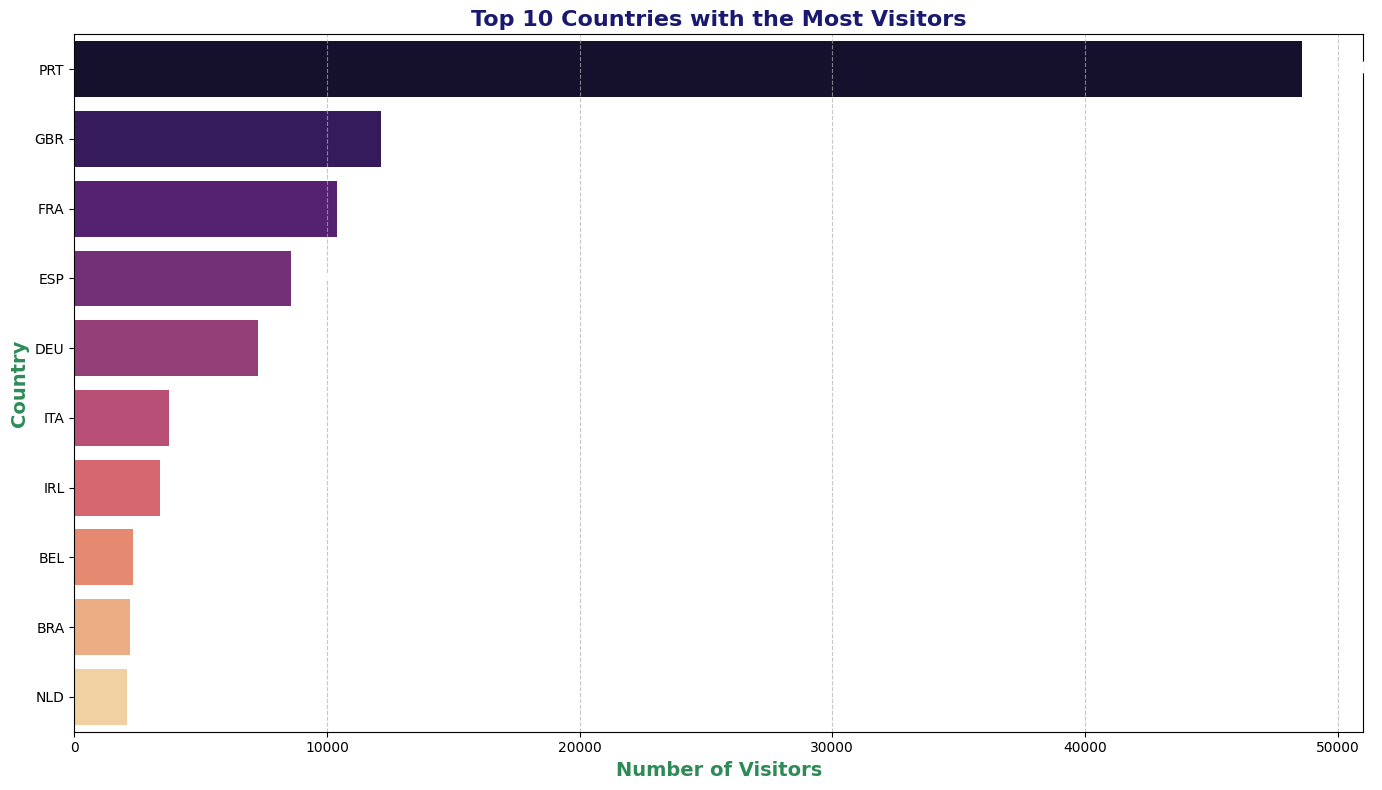

In [ ]:
# Calculate the visitor count for each country
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'counts']

# Select the top 10 countries
top_10_countries = country_counts.head(10)

# Now you can create your barplot
plt.figure(figsize=(14, 8))
sns.barplot(x='counts', y='country', data=top_10_countries, palette='magma')  # A more vibrant palette

# Add numbers on top of the bars for clarity
for index, value in enumerate(top_10_countries['counts']):
    plt.text(value + 500, index, f'{value}', ha='left', va='center', fontsize=12, fontweight='bold', color='white')

# Add title and labels with customized fonts and colors
plt.title('Top 10 Countries with the Most Visitors', fontsize=16, weight='bold', color='midnightblue')
plt.xlabel('Number of Visitors', fontsize=14, weight='bold', color='seagreen')
plt.ylabel('Country', fontsize=14, weight='bold', color='seagreen')

# Set gridlines for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi yang memperlihatkan 10 negara dengan jumlah pengunjung terbanyak, Portugal (PRT), termasuk pengunjung domestik, terlihat sebagai negara dengan jumlah pengunjung terbanyak, mencapai hampir 50.000. Negara-negara seperti Inggris (GBR), Prancis (FRA), dan Spanyol (ESP) juga menunjukkan jumlah pengunjung yang cukup signifikan, meskipun angkanya masih jauh di bawah Portugal. Sementara itu, Jerman (DEU), Italia (ITA), Belgia (BEL), Brasil (BRA), dan Belanda (NLD) tercatat dengan jumlah pengunjung yang lebih rendah, namun tetap menunjukkan adanya minat yang kuat terhadap kunjungan ke Portugal

### 7.Informasi Saluran Ditribusi Pemesanan

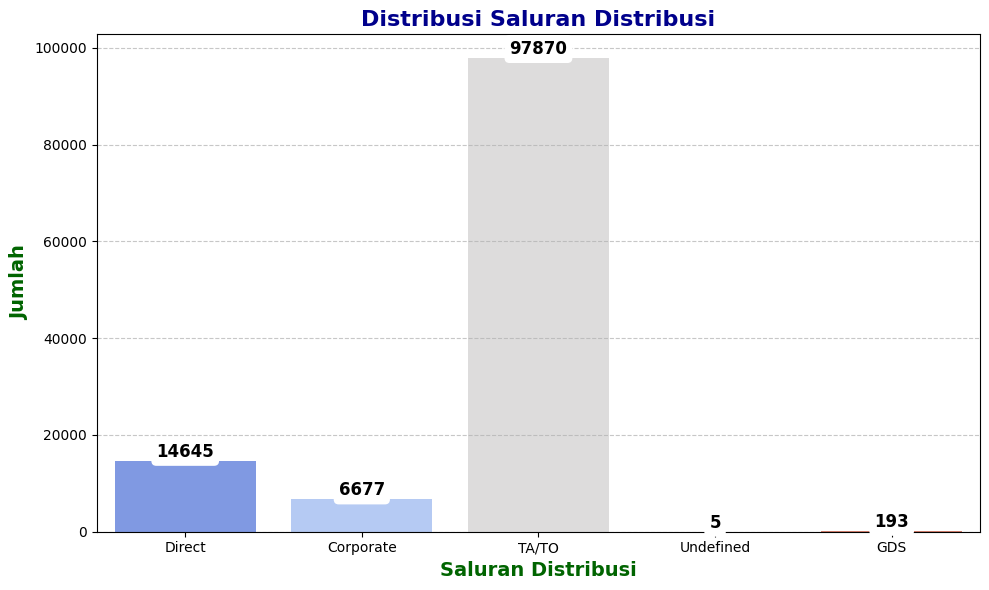

In [ ]:
# Menentukan ukuran figure
plt.figure(figsize=(10, 6))

# Menggunakan palet warna yang lebih variatif dan menarik
ax = sns.countplot(x='distribution_channel', data=data, palette='coolwarm')

# Menambahkan total nilai di atas setiap batang dengan efek bayangan
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=12, color='black',
                fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

# Menambahkan judul dengan font yang lebih menarik
plt.title('Distribusi Saluran Distribusi', fontsize=16, fontweight='bold', color='darkblue')

# Menambahkan label x dan y dengan gaya yang lebih elegan
plt.xlabel('Saluran Distribusi', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Jumlah', fontsize=14, fontweight='bold', color='darkgreen')

# Menambahkan grid halus di belakang plot untuk memberi kesan profesional
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot dengan penyesuaian tata letak
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi saluran distribusi, terlihat bahwa saluran "TA/TO" (Agen Perjalanan/Operator Tur) mendominasi dengan jumlah mendekati 100.000, jauh lebih tinggi dibandingkan dengan saluran lainnya. Saluran "Direct" juga menunjukkan angka yang cukup signifikan, meskipun masih jauh di bawah "TA/TO". Di sisi lain, saluran "Corporate" dan "GDS" (Sistem Distribusi Global) tercatat dengan angka yang lebih rendah, sedangkan saluran "Undefined" hampir tidak terlihat. Secara keseluruhan, dapat disimpulkan bahwa saluran distribusi utama yang paling efektif dalam menarik pengunjung adalah melalui agen perjalanan dan operator tur

### 8.Distribusi Jenis Pemesanan terhadap Ketertarikan Hotel

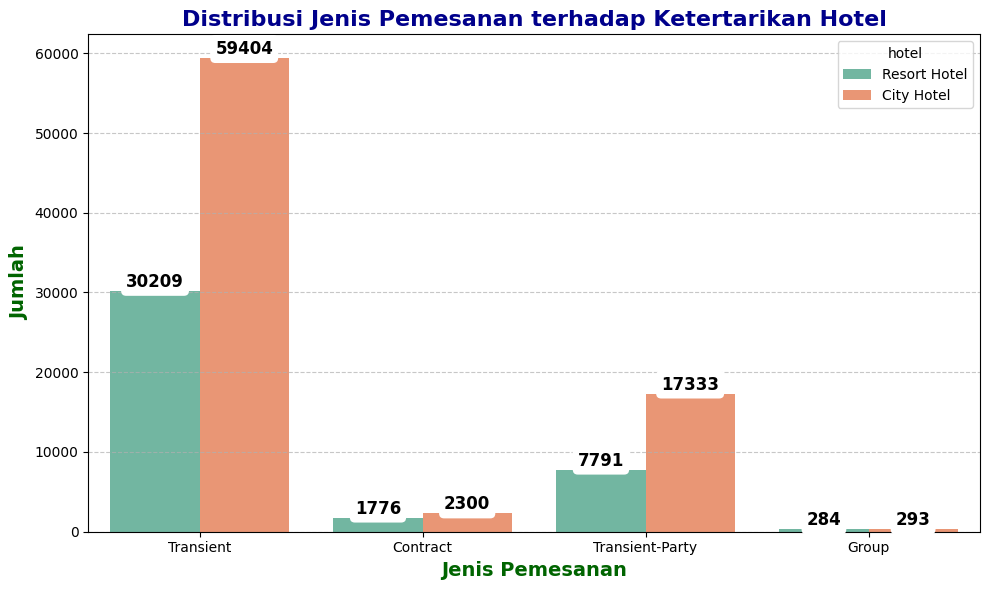

In [ ]:
# Menentukan ukuran figure
plt.figure(figsize=(10, 6))

# Menggunakan palet warna yang lebih kontras dan eye-catching
ax = sns.countplot(data=data, x='customer_type', hue='hotel', palette='Set2')

# Menambahkan total nilai di atas setiap batang dengan efek bayangan
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',  # Menampilkan nilai
                    (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                    ha='center', va='bottom', fontsize=12, color='black',
                    fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

# Menambahkan judul dengan font yang lebih menarik
plt.title('Distribusi Jenis Pemesanan terhadap Ketertarikan Hotel', fontsize=16, fontweight='bold', color='darkblue')

# Menambahkan label x dan y dengan gaya yang lebih elegan
plt.xlabel('Jenis Pemesanan', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Jumlah', fontsize=14, fontweight='bold', color='darkgreen')

# Menambahkan grid halus untuk memperjelas pembacaan data
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot dengan penyesuaian tata letak
plt.tight_layout()
plt.show()

Berdasarkan visualisasi distribusi jenis pemesanan terhadap ketertarikan hotel, dapat dilihat bahwa pemesanan dengan tipe "Transient" mendominasi, dengan jumlah yang mencapai sekitar 60.000. Di sisi lain, tipe pemesanan "Contract" dan "Transient-Party" menunjukkan jumlah yang lebih rendah, namun pemesan "Transient-Party" tetap menunjukkan minat yang cukup signifikan terhadap hotel. Tipe pemesanan "Group" mencatatkan angka yang paling rendah. Secara keseluruhan, dapat disimpulkan bahwa pemesanan individual (Transient) merupakan tipe yang paling menarik bagi hotel, sementara pemesanan grup dan tipe lainnya memiliki daya tarik yang lebih terbatas

### 9.Informasi Status Reservasi

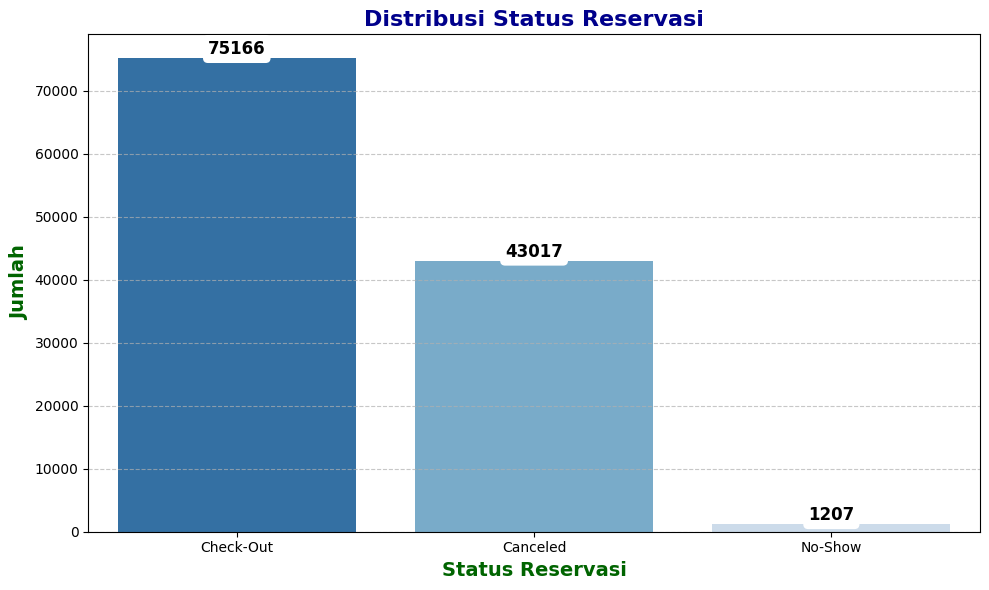

In [ ]:
# Menentukan ukuran figure
plt.figure(figsize=(10, 6))

# Menggunakan palet warna yang lebih cerah dan menarik
ax = sns.countplot(data=data, x='reservation_status', palette='Blues_r')

# Menambahkan total nilai di atas setiap batang dengan bayangan
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',  # Menampilkan nilai
                    (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                    ha='center', va='bottom', fontsize=12, color='black',
                    fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

# Menambahkan judul dengan font yang lebih besar dan menarik
plt.title('Distribusi Status Reservasi', fontsize=16, fontweight='bold', color='darkblue')

# Menambahkan label sumbu x dan y dengan gaya yang elegan
plt.xlabel('Status Reservasi', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Jumlah', fontsize=14, fontweight='bold', color='darkgreen')

# Menambahkan grid halus agar data lebih mudah dibaca
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot dengan tata letak yang rapih
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi distribusi status reservasi, dapat dilihat bahwa status "Check-Out" mencatatkan jumlah yang sangat tinggi, melebihi 70.000. Sebaliknya, status "Canceled" juga menunjukkan angka yang cukup besar, meskipun masih jauh di bawah "Check-Out", dengan jumlah sekitar 40.000. Sementara itu, status "No-Show" hampir tidak terlihat, dengan jumlah yang sangat rendah. Secara keseluruhan, dapat disimpulkan bahwa sebagian besar reservasi berakhir dengan keberangkatan (Check-Out), sementara tingkat pembatalan terbilang cukup tinggi, dan kasus ketidakhadiran (No-Show) sangat jarang terjadi

### 10.Informasi Jangka Waktu Menginap

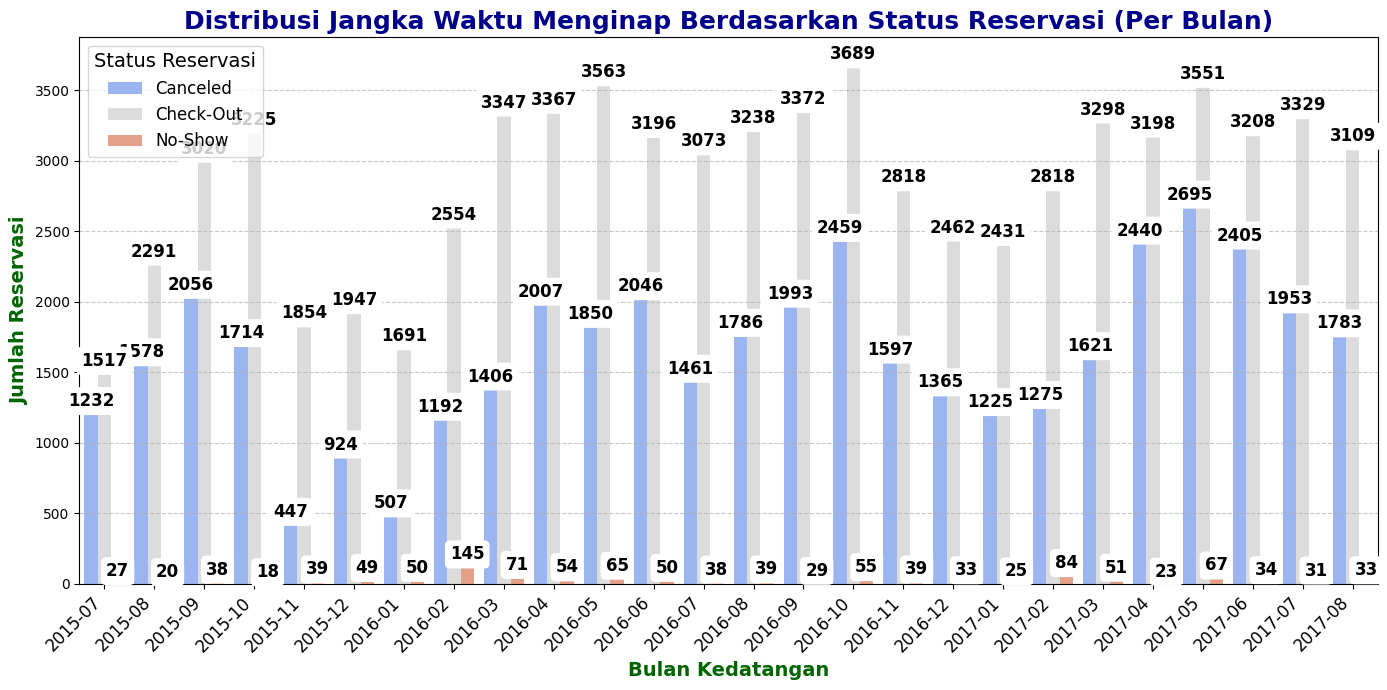

In [ ]:
# Mengonversi kolom tanggal
data['arrival_date'] = pd.to_datetime(
    data['arrival_date_year'].astype(str) + '-' +
    data['arrival_date_month'].astype(str) + '-' +
    data['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'
)

# Menambahkan kolom bulan sebagai pengelompokan
data['arrival_month'] = data['arrival_date'].dt.to_period('M')  # Mengelompokkan per bulan
status_count = data.groupby(['arrival_month', 'reservation_status']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(14, 7))

# Menggunakan palet warna yang lebih cerah dan kontras
ax = sns.barplot(data=status_count, x='arrival_month', y='count', hue='reservation_status', palette='coolwarm')

# Menambahkan total nilai di atas setiap batang dengan bayangan
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',  # Menampilkan nilai
                    (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                    ha='center', va='bottom', fontsize=12, color='black',
                    fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

# Menambahkan judul dengan font yang lebih besar dan menarik
plt.title('Distribusi Jangka Waktu Menginap Berdasarkan Status Reservasi (Per Bulan)', fontsize=18, fontweight='bold', color='darkblue')

# Menambahkan label sumbu x dan y dengan gaya yang lebih elegan
plt.xlabel('Bulan Kedatangan', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Jumlah Reservasi', fontsize=14, fontweight='bold', color='darkgreen')

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right', fontsize=12)

# Menambahkan legenda dengan gaya yang lebih jelas
plt.legend(title='Status Reservasi', fontsize=12, title_fontsize=14)

# Menambahkan grid untuk meningkatkan keterbacaan
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Menyesuaikan tata letak agar rapi
plt.tight_layout()
plt.show()

Visualisasi ini memperlihatkan distribusi status reservasi berdasarkan durasi menginap per bulan dari Juli 2015 hingga Agustus 2017. Dapat dilihat bahwa status "Check-Out" mendominasi, mencatatkan jumlah terbesar di setiap bulan. Pola musiman juga terlihat jelas, dengan lonjakan jumlah "Check-Out" pada bulan-bulan tertentu. Sementara itu, status "Canceled" menempati posisi kedua dengan jumlah yang cukup besar setelah "Check-Out." Meskipun ada variasi jumlah pembatalan dari bulan ke bulan, secara keseluruhan tren pembatalan cenderung stabil. Sebaliknya, status "No-Show" memiliki angka yang jauh lebih rendah dibandingkan kedua status lainnya, dengan jumlah yang relatif konsisten dan tanpa fluktuasi besar. Hal ini menunjukkan bahwa ketidakhadiran tamu pada reservasi sangat jarang terjadi dan tidak mempengaruhi tren keseluruhan secara signifikan.

Secara keseluruhan, visualisasi ini menggambarkan bahwa sebagian besar reservasi berhasil diselesaikan hingga tahap "Check-Out," diikuti oleh jumlah pembatalan yang cukup besar, sementara "No-Show" hanya muncul dalam jumlah yang sangat kecil. Pola musiman yang terlihat pada status reservasi tertentu memberikan wawasan tambahan yang berguna untuk menganalisis tren perjalanan.

## Ringkasan Eksplorasi Data

Eksplorasi data yang telah dilakukan memberikan banyak informasi dan wawasan untuk memahami dataset **Hotel Bookings Data**. Setiap visualisasi grafik menunjukkan pola yang beragam dan fluktuatif terkait kedatangan, pembatalan dan ketertarikan pengunjung terhadap jenis hotel yang ada (Hotel Kota dan Hotel Resort).

Salah satu analisis visual yang dilakukan adalah untuk menggambarkan distribusi status reservasi berdasarkan waktu kedatangan per bulan. Dalam visualisasi ini menghitung jumlah reservasi berdasarkan kombinasi bulan kedatangan (`arrival_month`) dan status reservasi (`reservation_status`). Dengan menggabungkan kolom `arrival_date_year`, `arrival_date_month`, dan `arrival_date_day_of_month` menjadi kolom baru bernama `arrival_date` yang kemudian dikelompokkan berdasarkan periode bulan menjadi kolom `arrival_month`. Melalui kolom ini, dapat diambil informasi yang lebih jelas dan mudah terkait banyaknya pengunjung yang datang.

Sehingga dari keseluruhan eksplorasi data ini, dapat disimpulkan bahwa adanya pola atau variasi teratur dalam pemesanan dan pembatalan yang terjadi pada waktu-waktu tertentu dalam setahun, serta preferensi yang kuat terhadap saluran distribusi tertentu, tipe pemesanana makanan, dan pengunjung yang datang dari berbagai negara.

## Data Preparation
Data preparation adalah proses yang digunakan untuk membersihkan, mengatur, dan mempersiapkan data sebelum digunakan dalam analisis atau model.

### Pra-Pemrosesan Data

 1. **Mengatasi Nilai Hilang:**
   - `children`: Mengisi nilai yang hilang dengan 0.
   - `country`: Mengisi nilai yang hilang dengan nilai mode (negara yang paling sering muncul).
   - `agent`:  Mengisi nilai yang hilang dengan 0.
   
2. **Menghilangkan Kolom:**
  - `company`

3. **Konversi Data:**
   
   Proses konversi dilakukan untuk mengubah kolom-kolom kategorikal seperti `hotel`, `meal`, `country`, dan kolom lainnya ke dalam format numerik sehingga dapat digunakan oleh algoritma machine learning.

3. **Normalisasi Data:**
   
   Pada tahap normalisasi menggunakan StandardScaler untuk menstandarkan kolom-kolom numerik dalam dataset. Proses ini mengubah data sehingga setiap fitur memiliki rata-rata nol dan deviasi standar satu.

In [ ]:
# Mengisi nilai yang hilang
country_mode = data['country'].mode()[0]
data['country'].fillna(country_mode, inplace=True)
data['children'].fillna(0, inplace=True)
data['agent'].fillna(0, inplace=True)
data.drop(columns=['company'], inplace=True)

In [ ]:
# List kolom numerik untuk LabelEncoder
categorical_columns = ['hotel', 'meal', 'country', 'arrival_date_month', 'market_segment',
                       'distribution_channel', 'reserved_room_type',
                       'assigned_room_type', 'deposit_type',
                       'customer_type', 'reservation_status', 'reservation_status_date', 'arrival_date',	'arrival_month']

label_encoders = {}

for column in categorical_columns:
    if column in data.columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.0,0,0,1,121,0,0
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.0,0,0,1,121,0,0
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,75.0,0,0,1,122,0,0
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0,1,122,0,0
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1,1,123,0,0


In [ ]:
# List kolom numerik untuk StandardScaler
numerical_columns = ['lead_time', 'arrival_date_year', 'arrival_date_month',
                     'arrival_date_week_number', 'arrival_date_day_of_month',
                     'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
                     'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
                     'previous_bookings_not_canceled', 'booking_changes', 'agent',
                     'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                     'total_of_special_requests', 'reservation_status_date', 'arrival_month', 'arrival_date']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan standardisasi hanya pada kolom numerik
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Menampilkan hasil Standardisasi
data[numerical_columns].head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_month,arrival_date
0,2.227051,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,4.260101,-0.698406,-0.131924,-2.015038,-0.254873,-0.720694,-1.739749,-1.828888,-1.898893
1,5.923385,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,5.793131,-0.698406,-0.131924,-2.015038,-0.254873,-0.720694,-1.739749,-1.828888,-1.898893
2,-0.907814,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-0.698406,-0.131924,-0.530935,-0.254873,-0.720694,-1.735353,-1.828888,-1.898893
3,-0.851667,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,2.138963,-0.131924,-0.530935,-0.254873,-0.720694,-1.735353,-1.828888,-1.898893
4,-0.842309,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,1.541622,-0.131924,-0.075810,-0.254873,0.540666,-1.730957,-1.828888,-1.898893


### Hasil Pra-Pemrosesan Data

In [ ]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month
0,1,0,2.227051,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260659,-0.081579,0,135,3,1,-0.18156,-0.10318,-0.091555,2,2,4.260101,0,-0.698406,-0.131924,2,-2.015038,-0.254873,-0.720694,1,-1.739749,-1.898893,-1.828888
1,1,0,5.923385,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260659,-0.081579,0,135,3,1,-0.18156,-0.10318,-0.091555,2,2,5.793131,0,-0.698406,-0.131924,2,-2.015038,-0.254873,-0.720694,1,-1.739749,-1.898893,-1.828888
2,1,0,-0.907814,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260659,-0.081579,0,59,3,1,-0.18156,-0.10318,-0.091555,0,2,-0.338990,0,-0.698406,-0.131924,2,-0.530935,-0.254873,-0.720694,1,-1.735353,-1.898893,-1.828888
3,1,0,-0.851667,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260659,-0.081579,0,59,2,0,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,2.138963,-0.131924,2,-0.530935,-0.254873,-0.720694,1,-1.735353,-1.898893,-1.828888
4,1,0,-0.842309,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-0.262174,0.247897,-0.260659,-0.081579,0,59,6,3,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,1.541622,-0.131924,2,-0.075810,-0.254873,0.540666,1,-1.730957,-1.898893,-1.828888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,-0.758089,1.192195,-1.270288,0.575875,1.617366,1.073895,1.309924,0.247897,-0.260659,-0.081579,0,15,5,3,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,2.978973,-0.131924,2,-0.112616,-0.254873,-0.720694,1,1.768322,1.637826,1.575307
119386,0,0,-0.018822,1.192195,-1.270288,0.575875,1.731251,1.073895,1.309924,1.974242,-0.260659,-0.081579,0,56,6,3,-0.18156,-0.10318,-0.091555,4,4,-0.338990,0,-0.614405,-0.131924,2,2.445779,-0.254873,1.802026,1,1.772718,1.642297,1.575307
119387,0,0,-0.655153,1.192195,-1.270288,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260659,-0.081579,0,43,6,3,-0.18156,-0.10318,-0.091555,3,3,-0.338990,0,-0.614405,-0.131924,2,1.105733,-0.254873,4.324746,1,1.772718,1.642297,1.575307
119388,0,0,0.046682,1.192195,-1.270288,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260659,-0.081579,0,59,6,3,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,0.132271,-0.131924,2,0.050833,-0.254873,-0.720694,1,1.772718,1.642297,1.575307


In [ ]:
# Menampilkan jumlah nilai yang hilang di setiap kolom
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# Menampilkan jumlah baris dan kolom dalam dataset
data.shape

(119390, 33)

**Setelah pembersihan**, dataset mencakup:
- **Periode Pengumpulan**: 1 Juli 2015 - 31 Agustus 2017
- **Jumlah Observasi:** 119.390
- **Jumlah Variabel:** 33

Dengan ini terjadi penambahan jumlah variabel, dari 32 menjadi 33. Penambahan ada pada variabel bernama `arrival_date`. Dimana variabel ini, menggabungkan isi dari 3 variabel (`arrival_date_year`, `arrival_date_month`, dan `arrival_date_day_of_month`) dalam format Year-Month-Date (Y-M-d). Kemudian, dengan tujuan mendapatkan informasi baru dilakukan pengelompokkan, menjadi variabel baru bernama `arrival_month`.        

Disamping penambahan, juga dilakukan penghapusan variabel selama proses pemrosesan data. Pada variabel dengan nama `company`.

#### Informasi Variabel dalam Dataset

Dalam dataset hotel.csv terdapat beberapa kolom yang menjadi acuan penting untuk pengolahan eksplorasi data. Kolom ini dipilih berdasarkan informasi isi kolom yang terkait dengan topik pembatalan pemesanan hotel. Untuk itu, deskripsi penjelasan diberikan untuk memberikan informasi yang lengkap

In [ ]:
daftar = {
    'Kolom': ['Hotel', 'Is Canceled', 'Lead Time', 'Meal', 'Country', 'Market Segment',
                 'Distribution Channel', 'Days in Waiting List', 'Customer Type', 'Reservation Status'],
    'Deskripsi Singkat': ['Jenis hotel yang dipesan (resort atau city)',
                          'Status pemesanan: dibatalkan atau tidak',
                          'Waktu antara pemesanan dan kedatangan (dalam hari)',
                          'Pilihan makanan yang dipesan (misalnya, sarapan, makan siang, makan malam)',
                          'Negara asal pemesan (berdasarkan kode negara)',
                          'Segmen pasar tempat pemesan melakukan pemesanan',
                          'Saluran distribusi yang digunakan untuk pemesanan',
                          'Jumlah hari yang dihabiskan pemesan dalam waiting list sebelum pemesanan dikonfirmasi',
                          'Jenis pelanggan (baru atau kembali)',
                          'Status pemesanan terakhir'],
    'Isi Kolom': ['Resort, City Hotel', '0, 1', '0 - 400', 'SC, BB, HB, FB',
                      'PRT, DEU, GBR, FRA', 'Corporate, Online TA, Offline TA, Group',
                      'Corporate, Online TA, Offline TA, Group', '0 - 1000',
                      'Contract, Transient, Transient-Party', 'Canceled, Check-Out, No Show']
}

# Membuat DataFrame dari dictionary
data_summary = pd.DataFrame(daftar)

# Menampilkan tabel
data_summary

,Kolom,Deskripsi Singkat,Isi Kolom
0,Hotel,Jenis hotel yang dipesan (resort atau city),"Resort, City Hotel"
1,Is Canceled,Status pemesanan: dibatalkan atau tidak,"0, 1"
2,Lead Time,Waktu antara pemesanan dan kedatangan (dalam h...,0 - 400
3,Meal,"Pilihan makanan yang dipesan (misalnya, sarapa...","SC, BB, HB, FB"
4,Country,Negara asal pemesan (berdasarkan kode negara),"PRT, DEU, GBR, FRA"
5,Market Segment,Segmen pasar tempat pemesan melakukan pemesanan,"Corporate, Online TA, Offline TA, Group"
6,Distribution Channel,Saluran distribusi yang digunakan untuk pemesanan,"Corporate, Online TA, Offline TA, Group"
7,Days in Waiting List,Jumlah hari yang dihabiskan pemesan dalam wait...,0 - 1000
8,Customer Type,Jenis pelanggan (baru atau kembali),"Contract, Transient, Transient-Party"
9,Reservation Status,Status pemesanan terakhir,"Canceled, Check-Out, No Show"


## Pemodelan

Sebelum dilakukan pelatihan model, langkah pertama adalah memisahkan fitur dan target dalam dataset. Di bawah ini, pemisahan dilakukan pada kolom is_canceled sebagai target (y) dan sisanya sebagai fitur (X). Setelah itu, data akan dibagi menjadi set pelatihan dan pengujian untuk keperluan evaluasi model

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Setelah membagi data menjadi pelatihan dan pengujian, langkah selanjutnya adalah menginisialisasi model klasifikasi. Di bawah ini, menggunakan model RandomForestClassifier dan kemudian melatih model tersebut menggunakan data pelatihan yang telah disiapkan

In [ ]:
# Inisialisasi model RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
history = rf_classifier.fit(X_train, y_train)

## Evaluasi

Langkah berikutnya adalah evaluasi untuk prediksi pada data uji. Menggunakan model yang telah dilatih untuk memprediksi nilai target pada set pengujian. Untuk mengetahui kinerja model dengan menghitung akurasinya

In [ ]:
# Lakukan prediksi pada data uji
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Random Forest: {accuracy}")

Akurasi Model Random Forest: 0.9999581204455985


Setelah melakukan prediksi pada data uji, dilakukan analisa lebih lanjut dengan menghitung probabilitas dari kelas positif. Dalam langkah ini, menghitung Mean Squared Error (MSE) dan Root Mean Squared Error (RMSE) menggunakan probabilitas yang diprediksi, untuk mendapatkan gambaran yang lebih jelas tentang kinerja model

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Prediksi probabilitas
y_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif (1)

# Hitung MSE (dengan probabilitas sebagai nilai kontinu)
mse = mean_squared_error(y_test, y_proba)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE) dengan probabilitas: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE) dengan probabilitas: 0.0005752826869922104
Root Mean Squared Error (RMSE): 0.02398505132352671


Setelah mengevaluasi model menggunakan metrik akurasi dan kesalahan, langkah selanjutnya adalah mencetak laporan klasifikasi. Laporan ini akan memberikan informasi yang lebih mendetail mengenai kinerja model, termasuk precision, recall, dan F1-score untuk masing-masing kelas

In [ ]:
# Cetak laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



Setelah mencetak laporan klasifikasi, langkah terakhir adalah membuat dan memvisualisasikan prediksi dalam Confusion Matrix. Confusion Matrix akan memberikan gambaran yang jelas tentang jumlah prediksi yang benar dan salah untuk masing-masing kelas (Not Canceled dan Canceled), sehingga dapat lebih memahami kinerja model secara keseluruhan

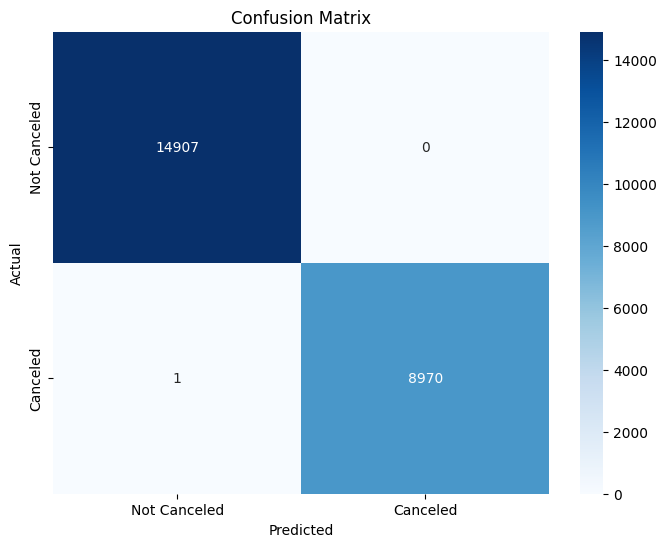

In [ ]:
# Buat Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Kesimpulan Keseluruhan📚

Analisis ini bertujuan untuk mengidentifikasi faktor-faktor yang mempengaruhi pembatalan pemesanan serta preferensi pelanggan, guna mengoptimalkan strategi pemasaran dan mengurangi tingkat pembatalan. Data yang dianalisis mencakup berbagai informasi, seperti asal negara pengunjung, tipe hotel, saluran distribusi, dan status pemesanan. Metode yang digunakan dalam analisis ini meliputi visualisasi data menggunakan histogram, serta pemodelan klasifikasi dengan algoritma Random Forest untuk memprediksi pembatalan pemesanan. Proses pra-pemrosesan data dilakukan dengan mengisi nilai yang hilang, menghapus kolom yang tidak relevan, mengonversi data kategorikal ke dalam format numerik, dan menormalkan data numerik.

Hasil analisis menunjukkan beberapa temuan menarik, seperti Portugal sebagai negara asal pengunjung terbanyak, tingginya transaksi pembatalan pemesanan, serta saluran distribusi utama yang didominasi oleh agen perjalanan. Selain itu, terdeteksi pola tertentu dalam status reservasi. Model Random Forest yang diterapkan menunjukkan kinerja yang memadai dalam memprediksi pembatalan, dengan metrik evaluasi seperti MSE, RMSE, precision, recall, dan F1-score memberikan gambaran tentang efektivitas model secara keseluruhan.

Implikasi dari analisis ini termasuk pemahaman terhadap preferensi pelanggan berdasarkan negara asal dan jenis pemesanan, yang dapat dimanfaatkan oleh hotel untuk menyesuaikan strategi pemasaran dan layanannya. Namun, analisis ini memiliki keterbatasan karena hanya menggunakan data yang tersedia. Penambahan data tambahan, seperti informasi demografi pelanggan, harga, dan ulasan, berpotensi memberikan wawasan yang lebih mendalam. Di sisi lain, model Random Forest dapat lebih ditingkatkan melalui penyetelan parameter atau dengan mencoba model lain.